## Titanic Classification

### Data analysis

In [85]:
%matplotlib notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
df = pd.read_csv("train.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


    Variable	             Definition	                  Key
    survival 	             Survival 	            0 = No, 1 = Yes
    pclass 	                Ticket class 	        1 = 1st, 2 = 2nd, 
                                                    3 = 3rd
    sex 	                 Sex 	
    Age 	                 Age in years 	
    sibsp 	                 # of siblings / spouses aboard the Titanic 	
    parch 	                 # of parents / children aboard the Titanic 	
    ticket 	                 Ticket number 	
    fare 	                 Passenger fare 	
    cabin 	                 Cabin number 	
    embarked 	             Port of Embarkation 	C = Cherbourg, Q = Queenstown,
                                                        S = Southampton
                                                        
                                                        
                                                        

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


As we see, Age and cabin has some Null values.....for now, lets keep them as they are

Now doing some statistical analysis

In [88]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [89]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


P-Class has some moderate negetive corr with survival

fare has positive corr with survival

In [90]:
survived = df[df["Survived"] == 1]
survive =  survived.groupby("Sex")["Survived"].count()
total =  df.groupby("Sex")["Survived"].count()

men = survive.loc['male']/total.loc['male']
women = survive.loc['female']/total.loc['female']

print(men,'\n',women)

0.18890814558058924 
 0.7420382165605095


Thus we see that only 18% men survived and 74% women survived

In [91]:
pclass_survival = survived.groupby("Pclass")["Survived"].count()
pclass_total = df.groupby("Pclass")["Survived"].count()
pclass_survival_percent = pclass_survival/pclass_total
pclass_survival_percent

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [92]:
pclass_survival_df = pd.DataFrame(pclass_survival)
pclass_survival_df.reset_index(inplace=True)

In [93]:
pclass_survival_df

,Pclass,Survived
0,1,136
1,2,87
2,3,119


<IPython.core.display.Javascript object>


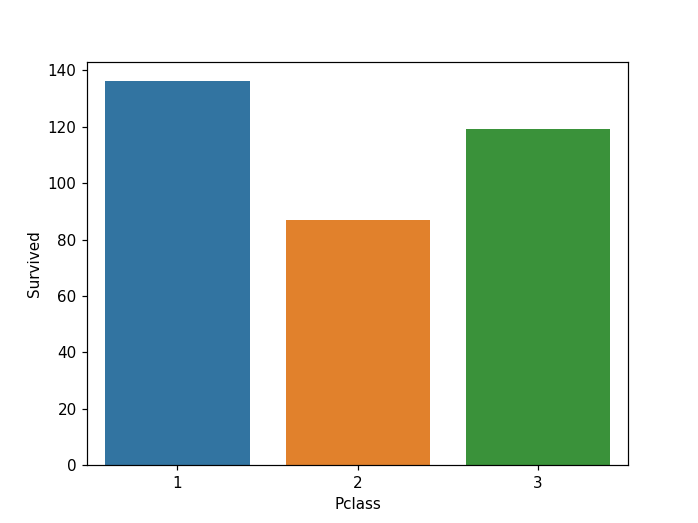

In [94]:
plt.figure()
sns.barplot(x = 'Pclass',y = 'Survived', data = pclass_survival_df)

As we see, the 1st class ticket holders had high survival count at 62.9%, while 3rd class ticket holders had the survival count of only 24.2% 

Plotting a distribution of fare of people who survived vs who died

In [95]:
survived_fare = survived[['Fare','Survived']]
survived_fare.describe()

,Fare,Survived
count,342.000000,342.0
mean,48.395408,1.0
std,66.596998,0.0
min,0.000000,1.0
25%,12.475000,1.0
50%,26.000000,1.0
75%,57.000000,1.0
max,512.329200,1.0


In [96]:
total_fare = df[['Fare', 'Survived']]
total_fare.describe()

,Fare,Survived
count,891.000000,891.000000
mean,32.204208,0.383838
std,49.693429,0.486592
min,0.000000,0.000000
25%,7.910400,0.000000
50%,14.454200,0.000000
75%,31.000000,1.000000
max,512.329200,1.000000


So we can see that there is significant increase in mean of fare, which means that higher fare had higher chance of survival

<IPython.core.display.Javascript object>


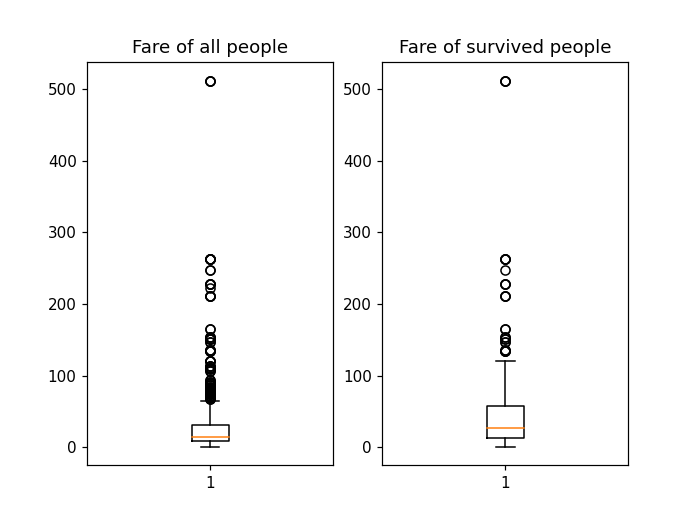

Text(0.5, 1.0, 'Fare of survived people')

In [97]:
plt.figure()
plt.subplot(1,2,1)
plt.boxplot(df['Fare'])
plt.title("Fare of all people")
plt.subplot(1,2,2)
plt.boxplot(survived['Fare'])
plt.title("Fare of survived people")

<IPython.core.display.Javascript object>


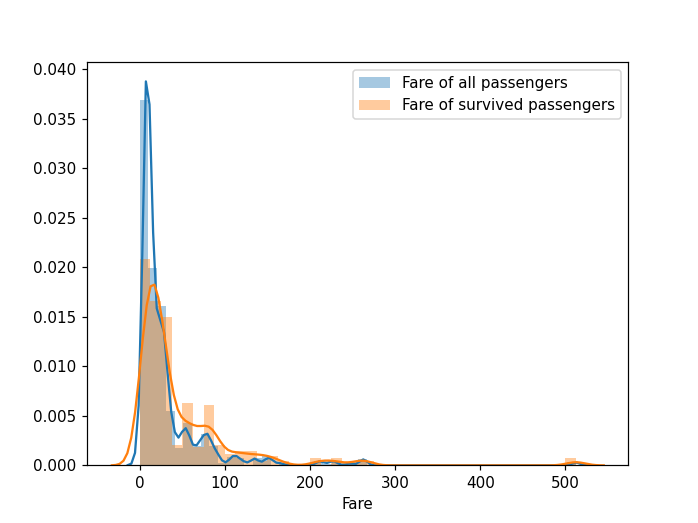

In [98]:
plt.figure()
sns.distplot(df["Fare"], label = 'Fare of all passengers')
sns.distplot(survived["Fare"], label = 'Fare of survived passengers')
plt.legend()

How to conduct Hypothesis test????

In [99]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Right now to simplify the dataset, we will remove Name and Cabin columns, as names will have no impact on survival chances, and cabin values are missing for majority of cases

In [100]:
df = df.drop(["Name", 'Cabin', 'SibSp', 'Parch', 'Ticket', 'Embarked'], axis = 1)

In [101]:
df

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3,male,22.0,7.2500
1,2,1,1,female,38.0,71.2833
2,3,1,3,female,26.0,7.9250
3,4,1,1,female,35.0,53.1000
4,5,0,3,male,35.0,8.0500
...,...,...,...,...,...,...
886,887,0,2,male,27.0,13.0000
887,888,1,1,female,19.0,30.0000
888,889,0,3,female,NaN,23.4500
889,890,1,1,male,26.0,30.0000


now working on categorical data

        Dividing pclass into 3 columns:
        1 ,2, 3
        
        Assigning male = 1, female = 2

In [102]:
def category_transform(row):
    if row["Pclass"] == 1:
        row["1st class"] = 1
        row["2nd class"] = 0
        row["3rd class"] = 0
    elif row["Pclass"] == 2:
        row["2nd class"] = 1
        row["1st class"] = 0
        row["3rd class"] = 0
    elif row["Pclass"] == 3:
        row["1st class"] = 0
        row["2nd class"] = 0
        row["3rd class"] = 1
    
    if row["Sex"] == "male":
        row["Sex"] = 1
    else:
        row["Sex"] = 2
    return row

df = df.apply(category_transform, axis = 1)
df.head(10)

,1st class,2nd class,3rd class,Age,Fare,PassengerId,Pclass,Sex,Survived
0,0,0,1,22.0,7.2500,1,3,1,0
1,1,0,0,38.0,71.2833,2,1,2,1
2,0,0,1,26.0,7.9250,3,3,2,1
3,1,0,0,35.0,53.1000,4,1,2,1
4,0,0,1,35.0,8.0500,5,3,1,0
5,0,0,1,NaN,8.4583,6,3,1,0
6,1,0,0,54.0,51.8625,7,1,1,0
7,0,0,1,2.0,21.0750,8,3,1,0
8,0,0,1,27.0,11.1333,9,3,2,1
9,0,1,0,14.0,30.0708,10,2,2,1


In [103]:
df.isnull().sum()

1st class        0
2nd class        0
3rd class        0
Age            177
Fare             0
PassengerId      0
Pclass           0
Sex              0
Survived         0
dtype: int64

In [104]:
df = df.dropna()

In [108]:
df =df.drop(["Pclass"], axis = 1)

In [109]:
df

,1st class,2nd class,3rd class,Age,Fare,PassengerId,Sex,Survived
0,0,0,1,22.0,7.2500,1,1,0
1,1,0,0,38.0,71.2833,2,2,1
2,0,0,1,26.0,7.9250,3,2,1
3,1,0,0,35.0,53.1000,4,2,1
4,0,0,1,35.0,8.0500,5,1,0
...,...,...,...,...,...,...,...,...
885,0,0,1,39.0,29.1250,886,2,0
886,0,1,0,27.0,13.0000,887,1,0
887,1,0,0,19.0,30.0000,888,2,1
889,1,0,0,26.0,30.0000,890,1,1


Scaling the data

In [122]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X = df.drop(["Survived"], axis = 1)
y = df["Survived"]

X_train,X_test,y_train,y_test = train_test_split(X , y)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_train_scaled

array([[0.        , 0.        , 1.        , ..., 0.01920972, 0.76067416,
        1.        ],
       [0.        , 0.        , 1.        , ..., 0.01546857, 0.91685393,
        1.        ],
       [0.        , 0.        , 1.        , ..., 0.06709553, 0.16516854,
        1.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.06104473, 0.60898876,
        1.        ],
       [0.        , 1.        , 0.        , ..., 0.04098927, 0.45505618,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.0585561 , 0.99662921,
        1.        ]])

In [123]:
X_test_scaled

array([[0.        , 0.        , 1.        , ..., 0.03998745, 0.9977195 ,
        1.        ],
       [0.        , 0.        , 1.        , ..., 0.05985437, 0.42645382,
        1.        ],
       [0.        , 0.        , 1.        , ..., 0.03612167, 0.31812999,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.02956274, 0.42417332,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.30114068, 0.89167617,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.91106043,
        0.        ]])

The foll models will be tested, along with accuracy score, recall, precision

In [124]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def scores(Y_TEST,Y_PREDICT):
    ACC = accuracy_score(Y_TEST, Y_PREDICT)
    PRE = precision_score(Y_TEST, Y_PREDICT)
    REC = recall_score(Y_TEST, Y_PREDICT)
    return ACC, PRE, REC


# Decision Trees

In [125]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_trained_scaled, y_train)
y_predict = clf.predict(X_test)
print(scores(y_test, y_predict))

(0.3743016759776536, 0.3743016759776536, 1.0)


# KNN

In [126]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier().fit(X_train, y_train)
y_predict = knc.predict(X_test)
print(scores(y_test, y_predict))

(0.6480446927374302, 0.54, 0.40298507462686567)


# Logistic regression

In [133]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter = 1000).fit(X_train, y_train)
y_predict = logreg.predict(X_test)
print(scores(y_test, y_predict))

(0.7932960893854749, 0.7586206896551724, 0.6567164179104478)
